In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('salaries.csv')
data.head()

Function  sup1  sup2  sup3  sup4  sup5  salary gender disabled  \
0   position1    16     1     0   350   135  125000  Woman    False   
1   position3     7     0     0   320   120   92000  Woman    False   
2   position3     4     0     0    25    15   88000  Woman    False   
3   position5     0     0     0     5     0   75000  Woman    False   
4  position18     0     0     0     0     0   67000  Woman    False   

        race         ...          inst4  inst5  instBudget      City State  \
0  Caucasian         ...            350    120     3100000  Edmonton    AB   
1      Other         ...            350    120     3100000  Edmonton    AB   
2  Caucasian         ...            350    120     3100000  Edmonton    AB   
3  Caucasian         ...            350    120     3100000  Edmonton    AB   
4  Caucasian         ...            350    120     3100000  Edmonton    AB   

       Zip  country  Category  instSize            instType  
0  T6G 2H9   CANADA       one     35630  Public Institution  
1  T6G 2H9   CANADA       one     35630  Public Institution  
2  T6G 2H9   CANADA       one     35630  Public Institution  
3  T6G 2H9   CANADA       one     35630  Public Institution  
4  T6G 2H9   CANADA       one     35630  Public Institution  

[5 rows x 29 columns]

In [4]:
data.mean()

sup1                       1.425292
sup2                       0.737549
sup3                       0.600693
sup4                      49.776527
sup5                       4.090515
salary                 49234.686712
disabled                   0.012993
yearsInPosition            5.690508
yearsInProfession          9.331236
age                       38.257220
cred1                      0.067129
cred2                      0.031615
inst1                     16.575574
inst2                      6.470333
inst3                      3.541793
inst4                    334.433088
inst5                     41.038545
instBudget           4751711.388732
instSize               25066.208858
dtype: float64

In [6]:
# for now, eliminate missing values (NaN)
data['missingSalary'] = pd.isnull(data['salary'])
data['missingAge'] = pd.isnull(data['age'])
data2 = data[(data.missingSalary == False) & (data.missingAge == False)]

In [8]:
# X is age, y is salary
X = data2.age.values
y = data2.salary.values

In [9]:
# arbitrarily define a linear model
m = 2000
b = 10000

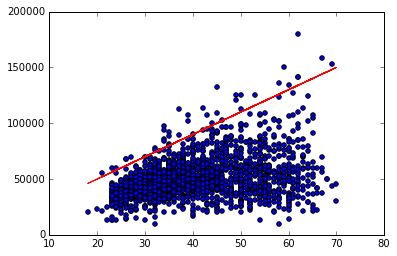

In [10]:
# plot X and y (blue) and linear model (red)
plt.scatter(X, y)
plt.plot(X, m*X + b, color='red')
plt.show()

Intercept: 
 23984.4910155
Coefficients: 
 [ 649.57280005]
Residual sum of squares: 265376883.08
Variance score: 0.17
Distribution of prediction error:


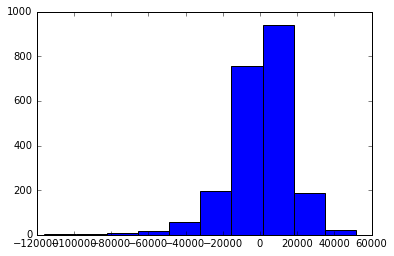

In [11]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = X.reshape(-1, 1)
regr.fit(X, y)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, y))
#vector of prediction error
print('Distribution of prediction error:')
predError = regr.predict(X) - y
plt.hist(predError)
plt.show()

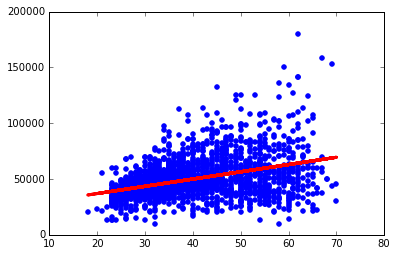

In [12]:
# Plot outputs
plt.scatter(X, y,  color='blue')
plt.plot(X, regr.predict(X), color='red',
         linewidth=3)
plt.show()